In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm

plt.style.use('bmh')
plt.rcParams["figure.figsize"] = (14, 10)

In [2]:
word = "debt"

df = pd.read_csv(os.path.join("data", "all_daily_trends", "daily_trends0", word + ".csv"))
df["date"] = pd.to_datetime(df["date"] )
df.set_index("date", inplace=True)
df = df.resample("B").last()

df.head()

,debt
date,
2004-01-01,26.0
2004-01-02,51.0
2004-01-05,85.0
2004-01-06,89.0
2004-01-07,77.0


<AxesSubplot:xlabel='date'>

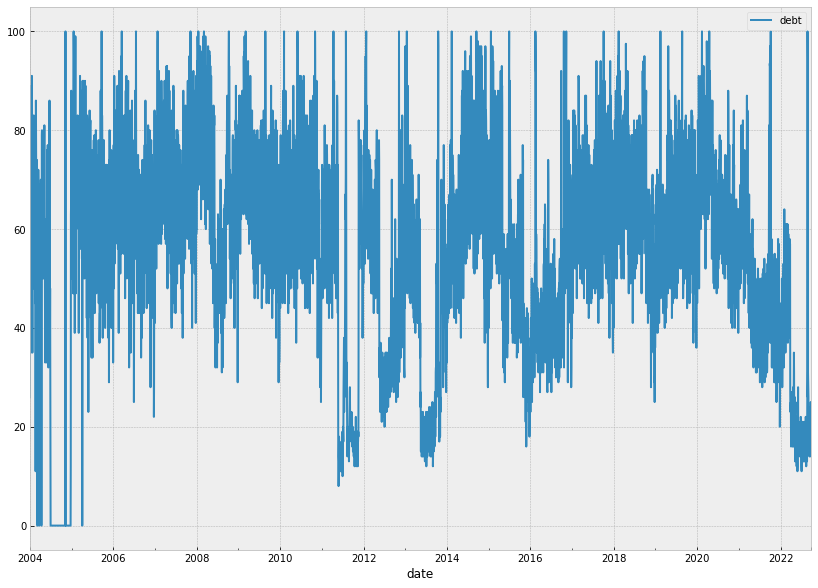

In [3]:
df.plot()

<AxesSubplot:xlabel='date'>

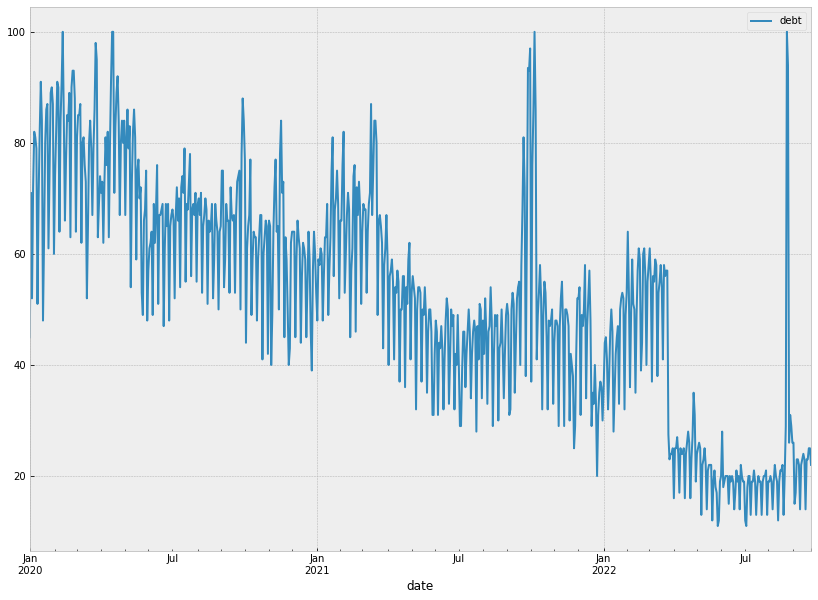

In [4]:
df.loc["2020-01-01":].plot()

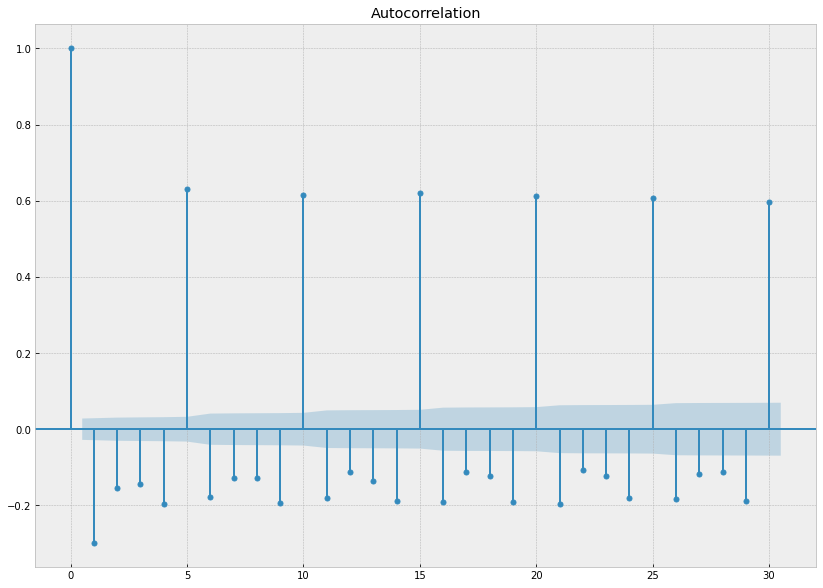

In [21]:
plot_acf(df[word].diff().dropna(), lags=30);

In [24]:
acf, confidence_interval = sm.tsa.acf(df[word].diff().dropna(), alpha=0.05, fft=False)

In [26]:
acf[1:]

array([-0.2977876 , -0.15531715, -0.1434529 , -0.19738018,  0.63023557,
       -0.17799885, -0.12828265, -0.12909634, -0.19465295,  0.6145798 ,
       -0.17994008, -0.1134798 , -0.13494679, -0.18905361,  0.62000055,
       -0.19249801, -0.11144165, -0.12369775, -0.19217402,  0.61368258,
       -0.1962258 , -0.10691346, -0.12211007, -0.18086686,  0.60649184,
       -0.18360653, -0.11786854, -0.11331781, -0.18942514,  0.59585711,
       -0.18978743, -0.10494276, -0.12814833, -0.17599072,  0.5934622 ,
       -0.17541285, -0.11449657, -0.12410669, -0.17223568,  0.59572558])

In [33]:
confidence_interval[1:,1] - acf[1:]

array([0.02803957, 0.03042461, 0.03104174, 0.03155865, 0.03251475,
       0.04100945, 0.04161244, 0.04192221, 0.04223361, 0.04293317,
       0.04936779, 0.04988078, 0.05008334, 0.05036841, 0.05092325,
       0.05654752, 0.0570604 , 0.05723127, 0.05744108, 0.05794437,
       0.06284694, 0.06332681, 0.06346856, 0.063653  , 0.06405578,
       0.06842175, 0.06880803, 0.06896659, 0.06911282, 0.06951981,
       0.07342541, 0.07381008, 0.0739273 , 0.07410174, 0.07442963,
       0.07806137, 0.07837067, 0.07850207, 0.07865618, 0.07895214])

In [35]:
np.where(acf[1:] >= (confidence_interval[1:,1] - acf[1:]), acf[1:], 0)

array([0.        , 0.        , 0.        , 0.        , 0.63023557,
       0.        , 0.        , 0.        , 0.        , 0.6145798 ,
       0.        , 0.        , 0.        , 0.        , 0.62000055,
       0.        , 0.        , 0.        , 0.        , 0.61368258,
       0.        , 0.        , 0.        , 0.        , 0.60649184,
       0.        , 0.        , 0.        , 0.        , 0.59585711,
       0.        , 0.        , 0.        , 0.        , 0.5934622 ,
       0.        , 0.        , 0.        , 0.        , 0.59572558])

In [40]:
(confidence_interval[1:,0] - acf[1:])

array([-0.02803957, -0.03042461, -0.03104174, -0.03155865, -0.03251475,
       -0.04100945, -0.04161244, -0.04192221, -0.04223361, -0.04293317,
       -0.04936779, -0.04988078, -0.05008334, -0.05036841, -0.05092325,
       -0.05654752, -0.0570604 , -0.05723127, -0.05744108, -0.05794437,
       -0.06284694, -0.06332681, -0.06346856, -0.063653  , -0.06405578,
       -0.06842175, -0.06880803, -0.06896659, -0.06911282, -0.06951981,
       -0.07342541, -0.07381008, -0.0739273 , -0.07410174, -0.07442963,
       -0.07806137, -0.07837067, -0.07850207, -0.07865618, -0.07895214])

In [42]:
np.where(acf[1:] <= (confidence_interval[1:,0] - acf[1:]), acf[1:], 0)

array([-0.2977876 , -0.15531715, -0.1434529 , -0.19738018,  0.        ,
       -0.17799885, -0.12828265, -0.12909634, -0.19465295,  0.        ,
       -0.17994008, -0.1134798 , -0.13494679, -0.18905361,  0.        ,
       -0.19249801, -0.11144165, -0.12369775, -0.19217402,  0.        ,
       -0.1962258 , -0.10691346, -0.12211007, -0.18086686,  0.        ,
       -0.18360653, -0.11786854, -0.11331781, -0.18942514,  0.        ,
       -0.18978743, -0.10494276, -0.12814833, -0.17599072,  0.        ,
       -0.17541285, -0.11449657, -0.12410669, -0.17223568,  0.        ])

## Log-tranformation and 1y lag difference

In [43]:
periods = 5

df[word + str(periods)] = np.log(df[word]).diff(periods=252).diff(periods=periods)

/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.6/site-packages/pandas/core/series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/danieloliveira/opt/anaconda3/envs/dcuoliveira/lib/python3.6/site-packages/pandas/core/algorithms.py:2001: RuntimeWarning: invalid value encountered in subtract
  out_arr[res_indexer] = arr[res_indexer] - arr[lag_indexer]


<AxesSubplot:xlabel='date'>

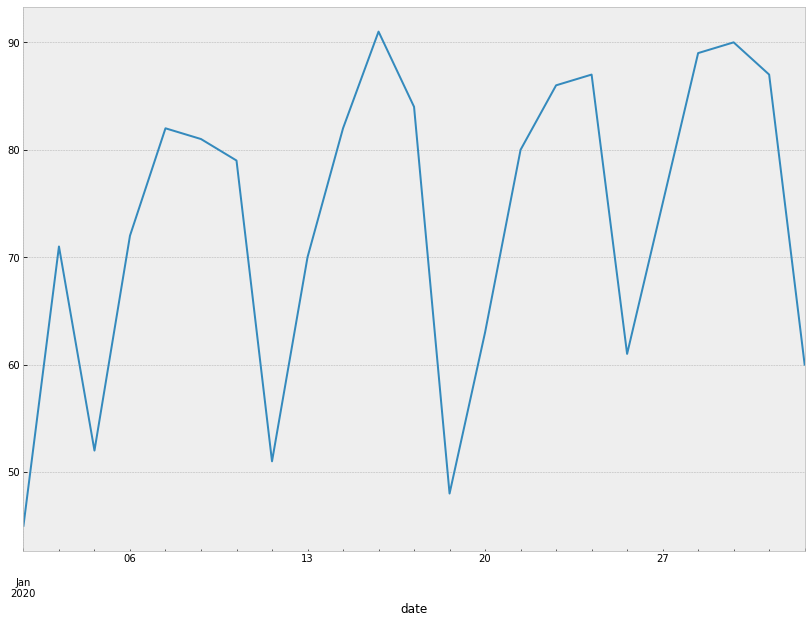

In [44]:
df[df.columns[0]].loc["2020-01-01":"2020-02-01"].plot()

<AxesSubplot:xlabel='date'>

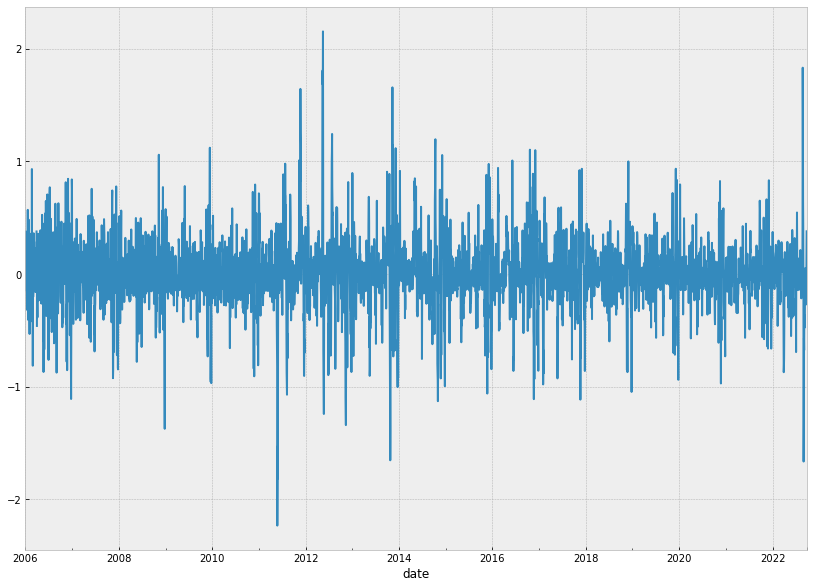

In [47]:
df[df.columns[1]].loc["2006-01-01":].plot()